# Where to live when you first move to London?   A data analysis approach

## Introduction

As part of the final capstone project for IBM Data Science Professional Certification in Coursera.  
I decided to write a post where I will share the different methods used to answer the problem: Where to live when you first move to London?  
In this project I will only focus on rent price and nearby venues.  

## Problem

“Where to live when you first move in London ?”  
Are you looking for a cheap place to live, a place close to all venues but still affordable, close to work, with good transport, residential...  
Using the data of Foursquare API and findproperly website I will attempt to answer this question.

<!-- wp:heading -->
<h2>Methodology</h2>
<!-- /wp:heading -->

<!-- wp:heading {"level":3} -->
<h3>Data Collection: Web scraping</h3>
<!-- /wp:heading -->

<!-- wp:paragraph -->
<p>In order to retrieve the data from Foursquare and Findproperly I will need to write some <a href="https://en.wikipedia.org/wiki/Data_scraping">data scraping</a> scripts using python.</p>
<!-- /wp:paragraph -->

<!-- wp:heading {"level":3} -->
<h3>Data preprocessing</h3>
<!-- /wp:heading -->

<!-- wp:paragraph -->
<p>Using the numpy and pands libraries I will clean and merge the two datasets together.</p>
<!-- /wp:paragraph -->

<!-- wp:heading {"level":3} -->
<h3>Data Exploration</h3>
<!-- /wp:heading -->

<!-- wp:paragraph -->
<p>Using matplotlib, seaborn, libraries I will explroe the data and try to extract some interesting insights.</p>
<!-- /wp:paragraph -->

<!-- wp:heading -->
<h2>Clustering</h2>
<!-- /wp:heading -->

<!-- wp:paragraph -->
<p><a href="https://en.wikipedia.org/wiki/Cluster_analysis"><strong>Clustering</strong> </a>is the task of grouping a set of objects in such a way that objects in the same group are more similar to each other than to those in other groups.<br>In order to address our initial problem I will apply a clustering algorithm on the the extracted data and try to cluster the different areas of London according to their type of venues, rent, number of parks and so on.</p>
<!-- /wp:paragraph -->

## Data Collection

In [8]:
import numpy as np # library to handle data in a vectorized manner
import os
import sys
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import geocoder as geocoder
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

import lxml.html as lh
from bs4 import BeautifulSoup

import wikipedia as wp

print('Libraries imported.')

Libraries imported.


#### Web Scrapping part

#### Map Latitude and Longitude to Postcode

In [19]:
df_house=pd.read_csv("df_house.csv")

In [20]:
#obtained from findproperly 
df_house.head()

District Neighborhood Areas  weekly_rent_1  weekly_rent_2  weekly_rent_3  \
0      BR1      Bromley   NaN            221            300            348   
1      BR2      Bromley   NaN            227            304            391   
2      BR3      Bromley   NaN            223            315            376   
3      BR4      Bromley   NaN            237            265            409   
4      BR5      Bromley   NaN            167            263            318   

   weekly_rent_4  sales_1  sales_2  sales_3  sales_4  
0            432      264      366      431    751.0  
1            629      231      367      520    603.0  
2            485      271      364      494    677.0  
3            508      147      353      592    734.0  
4            438      216      308      377    673.0

In [3]:
df_house['latitude']=""
df_house['longitude']=""
geolocator = Nominatim(user_agent="ny_explorer")    

In [5]:

for i, row in df_house.iterrows():
    #if (df_house.at[i,'latitude']=="" and df_house.at[i,'longitude']==""):
        try:        
            search_query = '{}, London,UK'.format(df_house['District'].iloc[i])
            latlong = geocoder.arcgis(search_query).latlng
            df_house.at[i,'latitude'] =latlong[0]
            df_house.at[i,'longitude'] =latlong[1]
        except Exception:
            pass

In [6]:
df_house.head()

District Neighborhood Areas  weekly_rent_1  weekly_rent_2  weekly_rent_3  \
0      BR1      Bromley   NaN            221            300            348   
1      BR2      Bromley   NaN            227            304            391   
2      BR3      Bromley   NaN            223            315            376   
3      BR4      Bromley   NaN            237            265            409   
4      BR5      Bromley   NaN            167            263            318   

   weekly_rent_4  sales_1  sales_2  sales_3  sales_4 latitude   longitude  
0            432      264      366      431    751.0  51.4167  0.00904221  
1            629      231      367      520    603.0  51.5064    -0.12721  
2            485      271      364      494    677.0  51.4151  -0.0354028  
3            508      147      353      592    734.0  51.5064    -0.12721  
4            438      216      308      377    673.0  51.5064    -0.12721

In [ ]:
df_house.to_csv("df_house_latlong.csv",index=False)

#### Import File from my local folder

In [ ]:
os.getcwd()

In [7]:
#os.getcwd()
df_house = pd.read_csv("df_house_latlong.csv",sep=",")
df_house.head(200)

District          Neighborhood                 Areas  weekly_rent_1  \
0        BR1               Bromley                   NaN            221   
1        BR2               Bromley                   NaN            227   
2        BR3               Bromley                   NaN            223   
3        BR4               Bromley                   NaN            237   
4        BR5               Bromley                   NaN            167   
5        BR6               Bromley                   NaN            162   
6        BR7               Bromley                   NaN            156   
7        BR8               Bromley                   NaN            230   
8        CR0               Croydon                   NaN            203   
9        CR2               Croydon                   NaN            219   
10       CR3               Croydon                   NaN            218   
11       CR4               Croydon                   NaN            182   
12       CR5               Croydon                   NaN            208   
13       CR6               Croydon                   NaN            202   
14       CR7               Croydon                   NaN            174   
15       CR8               Croydon                   NaN            188   
16       CR9               Croydon                   NaN            206   
17       DA1                Bexley                   NaN            176   
18       DA2              Dartford                   NaN            181   
19       DA3              Dartford                   NaN            160   
20       DA4              Dartford                   NaN            111   
21       DA5                Bexley                   NaN            213   
22       DA6                Bexley                   NaN            205   
23       DA7                Bexley                   NaN            127   
24       DA8                Bexley                   NaN            194   
25       DA9              Dartford                   NaN            182   
26      DA10              Dartford                   NaN            195   
27      DA11              Dartford                   NaN            161   
28      DA12              Dartford                   NaN            164   
29      DA13              Dartford                   NaN            182   
30      DA14                Bexley                Bexley            208   
31      DA15                Bexley                   NaN            170   
32      DA16              Dartford                   NaN            214   
33      DA17                Bexley                   NaN            196   
34      DA18              Dartford                   NaN            183   
35        E1               Eastern              Mile End            328   
36        E2               Eastern         Bethnal Green            250   
37        E3               Eastern                   Bow            223   
38        E4               Eastern             Chingford            229   
39        E5               Eastern               Clapton            311   
40        E6               Eastern              East Ham            261   
41        E7               Eastern           Forest Gate            202   
42        E8               Eastern               Hackney            384   
43        E9               Eastern               Hackney            274   
44       E10               Eastern                Leyton            250   
45       E11               Eastern           Leytonstone            253   
46       E12               Eastern            Manor Park            228   
47       E13               Eastern              Plaistow            279   
48       E14               Eastern          Isle of Dogs            275   
49       E15               Eastern             Stratford            287   
50       E16               Eastern          Canning Town            328   
51       E17               Eastern           Walthamstow            261   
52       E18               Ea

In [8]:
df_house.head()

District Neighborhood Areas  weekly_rent_1  weekly_rent_2  weekly_rent_3  \
0      BR1      Bromley   NaN            221            300            348   
1      BR2      Bromley   NaN            227            304            391   
2      BR3      Bromley   NaN            223            315            376   
3      BR4      Bromley   NaN            237            265            409   
4      BR5      Bromley   NaN            167            263            318   

   weekly_rent_4  sales_1  sales_2  sales_3  sales_4   latitude  longitude  
0            432      264      366      431      751  51.416710   0.009042  
1            629      231      367      520      603  51.506420  -0.127210  
2            485      271      364      494      677  51.415095  -0.035403  
3            508      147      353      592      734  51.506420  -0.127210  
4            438      216      308      377      673  51.506420  -0.127210

In [9]:

##shape it into desired format
df_house= pd.melt(df_house, id_vars=['District','Neighborhood','Areas','latitude','longitude'], value_vars=['weekly_rent_1', 'weekly_rent_2', 'weekly_rent_3','weekly_rent_4','sales_1','sales_2','sales_3','sales_4'])


In [10]:
df_house.head()

District Neighborhood Areas   latitude  longitude       variable  value
0      BR1      Bromley   NaN  51.416710   0.009042  weekly_rent_1    221
1      BR2      Bromley   NaN  51.506420  -0.127210  weekly_rent_1    227
2      BR3      Bromley   NaN  51.415095  -0.035403  weekly_rent_1    223
3      BR4      Bromley   NaN  51.506420  -0.127210  weekly_rent_1    237
4      BR5      Bromley   NaN  51.506420  -0.127210  weekly_rent_1    167

#### Add new column type Sale or Rent

In [11]:
df_house['type']=np.where(df_house['variable'].str.contains('rent')==True    , 'Rent', 'Sale')

#### Get the last character of the column bedroom

In [12]:
df_house = df_house.rename(columns={'variable': 'bedroom'})
df_house['bedroom']=df_house['bedroom'].str[-1:]
df_house.head()

District Neighborhood Areas   latitude  longitude bedroom  value  type
0      BR1      Bromley   NaN  51.416710   0.009042       1    221  Rent
1      BR2      Bromley   NaN  51.506420  -0.127210       1    227  Rent
2      BR3      Bromley   NaN  51.415095  -0.035403       1    223  Rent
3      BR4      Bromley   NaN  51.506420  -0.127210       1    237  Rent
4      BR5      Bromley   NaN  51.506420  -0.127210       1    167  Rent

### List of areas of London

In order to later plot our data onto a map we need to get the borough name for each postcode.  
We can scrap a wikipedia page which contains the borough name related to each postcode. 

In [13]:
#Get the html source
html = wp.page("List of areas of London").html().encode("UTF-8")
df_wiki = pd.read_html(html)[1]
df_wiki.head()

Location                     London borough       Post town  \
0   Abbey Wood              Bexley, Greenwich [7]          LONDON   
1        Acton  Ealing, Hammersmith and Fulham[8]          LONDON   
2    Addington                         Croydon[8]         CROYDON   
3   Addiscombe                         Croydon[8]         CROYDON   
4  Albany Park                             Bexley  BEXLEY, SIDCUP   

  Postcode district Dial code OS grid ref  
0               SE2       020    TQ465785  
1            W3, W4       020    TQ205805  
2               CR0       020    TQ375645  
3               CR0       020    TQ345665  
4         DA5, DA14       020    TQ478728

In [14]:
df_wiki.shape

(533, 6)

In [15]:
df_wiki = df_wiki.drop(df_wiki.columns[[2,4,5]], axis=1)  # df.columns is zero-based pd.Index 

In [16]:
df_wiki.head()

Location                     London borough Postcode district
0   Abbey Wood              Bexley, Greenwich [7]               SE2
1        Acton  Ealing, Hammersmith and Fulham[8]            W3, W4
2    Addington                         Croydon[8]               CR0
3   Addiscombe                         Croydon[8]               CR0
4  Albany Park                             Bexley         DA5, DA14

#### Rename unneeded columns

In [17]:
df_wiki.columns = ['Location','London_borough','Postcode']

#### Data Cleansing

In [18]:
df_wiki['London_borough'] =  df_wiki['London_borough'].apply(lambda x: x.replace('[','').replace(']','')) 
df_wiki['Postcode'] =  df_wiki['Postcode'].apply(lambda x: x.replace('[','').replace(']','')) 
df_wiki['London_borough'] =  df_wiki['London_borough'].str.replace('\d+', '')

In [19]:
df_wiki.head()

Location                  London_borough   Postcode
0   Abbey Wood              Bexley, Greenwich         SE2
1        Acton  Ealing, Hammersmith and Fulham     W3, W4
2    Addington                         Croydon        CR0
3   Addiscombe                         Croydon        CR0
4  Albany Park                          Bexley  DA5, DA14

In [20]:
#https://stackoverflow.com/questions/12680754/split-explode-pandas-dataframe-string-entry-to-separate-rows
def explode(df, lst_cols, fill_value='', preserve_index=False):
    # make sure `lst_cols` is list-alike
    if (lst_cols is not None
        and len(lst_cols) > 0
        and not isinstance(lst_cols, (list, tuple, np.ndarray, pd.Series))):
        lst_cols = [lst_cols]
    # all columns except `lst_cols`
    idx_cols = df.columns.difference(lst_cols)
    # calculate lengths of lists
    lens = df[lst_cols[0]].str.len()
    # preserve original index values    
    idx = np.repeat(df.index.values, lens)
    # create "exploded" DF
    res = (pd.DataFrame({
                col:np.repeat(df[col].values, lens)
                for col in idx_cols},
                index=idx)
             .assign(**{col:np.concatenate(df.loc[lens>0, col].values)
                            for col in lst_cols}))
    # append those rows that have empty lists
    if (lens == 0).any():
        # at least one list in cells is empty
        res = (res.append(df.loc[lens==0, idx_cols], sort=False)
                  .fillna(fill_value))
    # revert the original index order
    res = res.sort_index()
    # reset index if requested
    if not preserve_index:        
        res = res.reset_index(drop=True)
    return res

In [21]:
df_wiki_clean=explode(df_wiki.assign(Postcode=df_wiki.Postcode.str.split(',')), 'Postcode')

In [22]:
df_wiki_clean.head(10)

Location                  London_borough Postcode
0        Abbey Wood              Bexley, Greenwich       SE2
1             Acton  Ealing, Hammersmith and Fulham       W3
2             Acton  Ealing, Hammersmith and Fulham       W4
3         Addington                         Croydon      CR0
4        Addiscombe                         Croydon      CR0
5       Albany Park                          Bexley      DA5
6       Albany Park                          Bexley     DA14
7  Aldborough Hatch                       Redbridge      IG2
8           Aldgate                            City      EC3
9           Aldwych                     Westminster      WC2

In [23]:
df_wiki_clean=explode(df_wiki_clean.assign(London_borough=df_wiki_clean.London_borough.str.split(',')), 'London_borough')

In [24]:
df_wiki_clean.head(10)

Location Postcode           London_borough
0   Abbey Wood      SE2                   Bexley
1   Abbey Wood      SE2               Greenwich 
2        Acton       W3                   Ealing
3        Acton       W3   Hammersmith and Fulham
4        Acton       W4                   Ealing
5        Acton       W4   Hammersmith and Fulham
6    Addington      CR0                  Croydon
7   Addiscombe      CR0                  Croydon
8  Albany Park      DA5                   Bexley
9  Albany Park     DA14                   Bexley

#### Save file

In [ ]:
df_wiki_clean.to_csv("df_wiki_clean_unique.csv",index=False)

#### import file

In [25]:
df_wiki_clean = pd.read_csv("df_wiki_clean_unique.csv")
df_wiki_clean.head(10)

Location Postcode           London_borough
0   Abbey Wood      SE2                   Bexley
1   Abbey Wood      SE2               Greenwich 
2        Acton       W3                   Ealing
3        Acton       W3   Hammersmith and Fulham
4        Acton       W4                   Ealing
5        Acton       W4   Hammersmith and Fulham
6    Addington      CR0                  Croydon
7   Addiscombe      CR0                  Croydon
8  Albany Park      DA5                   Bexley
9  Albany Park     DA14                   Bexley

In [26]:
df_house.head()

District Neighborhood Areas   latitude  longitude bedroom  value  type
0      BR1      Bromley   NaN  51.416710   0.009042       1    221  Rent
1      BR2      Bromley   NaN  51.506420  -0.127210       1    227  Rent
2      BR3      Bromley   NaN  51.415095  -0.035403       1    223  Rent
3      BR4      Bromley   NaN  51.506420  -0.127210       1    237  Rent
4      BR5      Bromley   NaN  51.506420  -0.127210       1    167  Rent

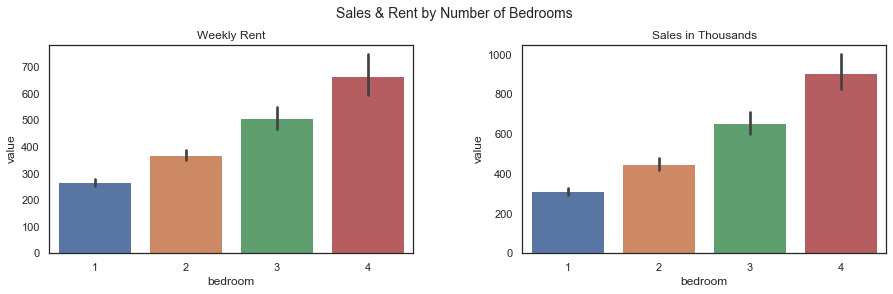

In [28]:
df_mean_rent=df_house.loc[df_house['type'] == 'Rent']
df_mean_sale=df_house.loc[df_house['type'] == 'Sale']
import seaborn as sns
fig = plt.figure(figsize=(15,4))
title = fig.suptitle("Sales & Rent by Number of Bedrooms", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax1 = fig.add_subplot(1,2,1)
ax1.set_title("Weekly Rent")
sns.set(style="white")
sns.barplot(x="bedroom", y="value", data=df_mean_rent)

ax2 = fig.add_subplot(1,2,2)
ax2.set_title("Sales in Thousands")
sns.set(style="white")
sns.barplot(x="bedroom", y="value", data=df_mean_sale)

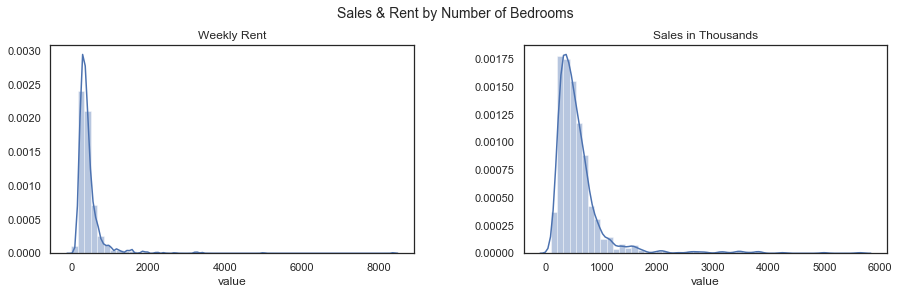

In [29]:
fig = plt.figure(figsize=(15,4))
title = fig.suptitle("Sales & Rent by Number of Bedrooms", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax1 = fig.add_subplot(1,2,1)
ax1.set_title("Weekly Rent")
sns.set(style="white")
sns.distplot(df_mean_rent['value'])

ax2 = fig.add_subplot(1,2,2)
ax2.set_title("Sales in Thousands")
sns.set(style="white")
sns.distplot(df_mean_sale['value'])


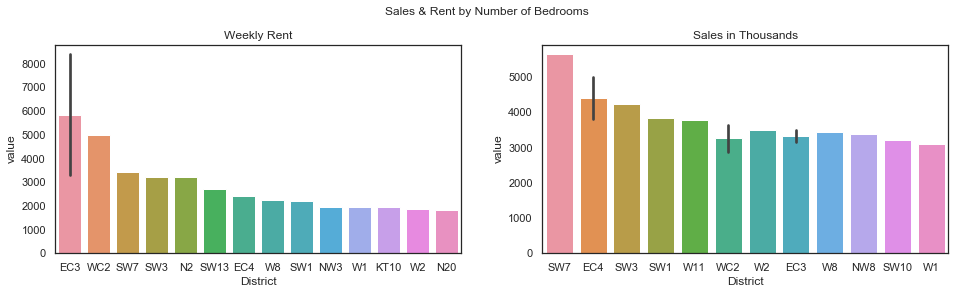

In [30]:
fig = plt.figure(figsize=(16,4))
title = fig.suptitle("Sales & Rent by Number of Bedrooms", fontsize=12)
fig.subplots_adjust(top=0.85, wspace=0.2)

ax1 = fig.add_subplot(1,2,1)
ax1.set_title("Weekly Rent")
sns.set(style="white")
sns.barplot(x="District", y="value", data=df_mean_rent.nlargest(15, 'value'))

ax2 = fig.add_subplot(1,2,2)
ax2.set_title("Sales in Thousands")
sns.set(style="white")
sns.barplot(x="District", y="value", data=df_mean_sale.nlargest(15, 'value'))

In [31]:
df_mean_sale_15=df_mean_sale.nlargest(15, 'value')
df_mean_rent_15=df_mean_rent.nlargest(15, 'value')

top 15 rent not present in top15 sales

In [32]:
df_mean_rent_15[~df_mean_rent_15['District'].isin(df_mean_sale_15['District'])].dropna()

District     Neighborhood          Areas  latitude  longitude bedroom  \
948       N2         Northern  East Finchley  51.58927   -0.16395       4   
769     SW13        Battersea         Barnes  51.47457   -0.24212       3   
971      NW3  North Western\t      Hampstead  51.55506   -0.17348       4   
966      N20         Northern     Totteridge  51.63261   -0.17562       4   

     value  type  
948   3228  Rent  
769   2694  Rent  
971   1962  Rent  
966   1834  Rent

top 15 sales not present in top15 rent

In [33]:
df_mean_sale_15[~df_mean_sale_15['District'].isin(df_mean_rent_15['District'])].dropna()

District     Neighborhood           Areas  latitude  longitude bedroom  \
2207      W11       Paddington    Holland Park  51.51244   -0.20639       4   
2088      NW8  North Western\t  St John's Wood  51.53398   -0.17378       4   
2156     SW10  South Western\t   West Brompton  51.48563   -0.18144       4   

      value  type  
2207   3781  Sale  
2088   3391  Sale  
2156   3224  Sale

In [34]:
df_mean_rent[df_mean_rent["District"]=="SW13"]

District Neighborhood   Areas  latitude  longitude bedroom  value  type
213      SW13    Battersea  Barnes  51.47457   -0.24212       1    658  Rent
491      SW13    Battersea  Barnes  51.47457   -0.24212       2    837  Rent
769      SW13    Battersea  Barnes  51.47457   -0.24212       3   2694  Rent
1047     SW13    Battersea  Barnes  51.47457   -0.24212       4    904  Rent

### Merge London Boroughs and London Property price

In [35]:
df_all=pd.merge(df_house, df_wiki_clean, how='inner', left_on='District', right_on='Postcode')

In [36]:
print(f'The shape of df_house is {df_house.shape} , the shape of df_wiki_clean is {df_wiki_clean.shape} ', \
      f'and the shape of df_all is {df_all.shape}')

The shape of df_house is (2224, 8) , the shape of df_wiki_clean is (679, 3)  and the shape of df_all is (4456, 11)


In [37]:
df_all.head(20)

District Neighborhood Areas  latitude  longitude bedroom  value  type  \
0       BR1      Bromley   NaN  51.41671   0.009042       1    221  Rent   
1       BR1      Bromley   NaN  51.41671   0.009042       1    221  Rent   
2       BR1      Bromley   NaN  51.41671   0.009042       1    221  Rent   
3       BR1      Bromley   NaN  51.41671   0.009042       1    221  Rent   
4       BR1      Bromley   NaN  51.41671   0.009042       1    221  Rent   
5       BR1      Bromley   NaN  51.41671   0.009042       2    300  Rent   
6       BR1      Bromley   NaN  51.41671   0.009042       2    300  Rent   
7       BR1      Bromley   NaN  51.41671   0.009042       2    300  Rent   
8       BR1      Bromley   NaN  51.41671   0.009042       2    300  Rent   
9       BR1      Bromley   NaN  51.41671   0.009042       2    300  Rent   
10      BR1      Bromley   NaN  51.41671   0.009042       3    348  Rent   
11      BR1      Bromley   NaN  51.41671   0.009042       3    348  Rent   
12      BR1      Bromley   NaN  51.41671   0.009042       3    348  Rent   
13      BR1      Bromley   NaN  51.41671   0.009042       3    348  Rent   
14      BR1      Bromley   NaN  51.41671   0.009042       3    348  Rent   
15      BR1      Bromley   NaN  51.41671   0.009042       4    432  Rent   
16      BR1      Bromley   NaN  51.41671   0.009042       4    432  Rent   
17      BR1      Bromley   NaN  51.41671   0.009042       4    432  Rent   
18      BR1      Bromley   NaN  51.41671   0.009042       4    432  Rent   
19      BR1      Bromley   NaN  51.41671   0.009042       4    432  Rent   

                        Location Postcode London_borough  
0                        Bromley      BR1        Bromley  
1                        Downham      BR1       Lewisham  
2                       Plaistow      BR1        Bromley  
3                      Sundridge      BR1        Bromley  
4   Widmore (also Widmore Green)      BR1        Bromley  
5                        Bromley      BR1        Bromley  
6                        Downham      BR1       Lewisham  
7                       Plaistow      BR1        Bromley  
8                      Sundridge      BR1        Bromley  
9   Widmore (also Widmore Green)      BR1        Bromley  
10                       Bromley      BR1        Bromley  
11                       Downham      BR1       Lewisham  
12                      Plaistow      BR1        Bromley  
13                     Sundridge      BR1        Bromley  
14  Widmore (also Widmore Green)      BR1        Bromley  
15                       Bromley      BR1        Bromley  
16                       Downham      BR1       Lewisham  
17                      Plaistow      BR1        Bromley  
18                     Sundridge      BR1        Bromley  
19  Widmore (also Widmore Green)      BR1        Bromley

#### Remove unneeded columns

In [38]:
df_all = df_all.drop(df_all.columns[[0,1,2,8]], axis=1)  # df.columns is zero-based pd.Index 

In [39]:
new_order = [5, 6, 4, 2, 3, 0,1]
df_all = df_all[df_all.columns[new_order]]
df_all.head()

Postcode London_borough  type bedroom  value  latitude  longitude
0      BR1        Bromley  Rent       1    221  51.41671   0.009042
1      BR1       Lewisham  Rent       1    221  51.41671   0.009042
2      BR1        Bromley  Rent       1    221  51.41671   0.009042
3      BR1        Bromley  Rent       1    221  51.41671   0.009042
4      BR1        Bromley  Rent       1    221  51.41671   0.009042

In [40]:
df_all.shape

(4456, 7)

In [41]:
df_all.drop_duplicates(keep="first",inplace=True)

In [42]:
df_all[df_all["Postcode"]=="BR1"]

Postcode London_borough  type bedroom  value  latitude  longitude
0       BR1        Bromley  Rent       1    221  51.41671   0.009042
1       BR1       Lewisham  Rent       1    221  51.41671   0.009042
5       BR1        Bromley  Rent       2    300  51.41671   0.009042
6       BR1       Lewisham  Rent       2    300  51.41671   0.009042
10      BR1        Bromley  Rent       3    348  51.41671   0.009042
11      BR1       Lewisham  Rent       3    348  51.41671   0.009042
15      BR1        Bromley  Rent       4    432  51.41671   0.009042
16      BR1       Lewisham  Rent       4    432  51.41671   0.009042
20      BR1        Bromley  Sale       1    264  51.41671   0.009042
21      BR1       Lewisham  Sale       1    264  51.41671   0.009042
25      BR1        Bromley  Sale       2    366  51.41671   0.009042
26      BR1       Lewisham  Sale       2    366  51.41671   0.009042
30      BR1        Bromley  Sale       3    431  51.41671   0.009042
31      BR1       Lewisham  Sale       3    431  51.41671   0.009042
35      BR1        Bromley  Sale       4    751  51.41671   0.009042
36      BR1       Lewisham  Sale       4    751  51.41671   0.009042

In [43]:
df_all.shape

(2208, 7)

#### save file

In [ ]:
df_all.to_csv("df_all.csv",index=False)

#### read file

In [1]:
df_all = pd.read_csv("df_all.csv")
df_all.head(10)

Postcode London_borough  type  bedroom  value  latitude  longitude
0      BR1        Bromley  Rent        1    221  51.41671   0.009042
1      BR1       Lewisham  Rent        1    221  51.41671   0.009042
2      BR1        Bromley  Rent        2    300  51.41671   0.009042
3      BR1       Lewisham  Rent        2    300  51.41671   0.009042
4      BR1        Bromley  Rent        3    348  51.41671   0.009042
5      BR1       Lewisham  Rent        3    348  51.41671   0.009042
6      BR1        Bromley  Rent        4    432  51.41671   0.009042
7      BR1       Lewisham  Rent        4    432  51.41671   0.009042
8      BR1        Bromley  Sale        1    264  51.41671   0.009042
9      BR1       Lewisham  Sale        1    264  51.41671   0.009042

#### df_Rent

In [2]:
df_rent=df_all.loc[df_all['type'] == 'Rent']

df_rent=df_rent[['London_borough','latitude','longitude','value']]

df_rent['avg_rent'] = df_rent.groupby(['London_borough','latitude','longitude'])['value'].transform('mean')

del df_rent['value']





In [ ]:
# for the v2 where to invest
#df_rent=df_all.loc[df_all['type'] == 'Rent']
#df_sale=df_all.loc[df_all['type'] == 'Sale']
#df_merge=df = df_rent.merge(df_sale, on=['Postcode','London_borough','bedroom'], how='inner')

#df_rent=df_rent[['London_borough','latitude','longitude','value']]
#df_sale=df_sale[['London_borough','latitude','longitude','value']]

#df_rent['avg_rent'] = df_rent.groupby(['London_borough','latitude','longitude'])['value'].transform('mean')
#df_sale['avg_sale'] = df_sale.groupby(['London_borough','latitude','longitude'])['value'].transform('mean')

#del df_rent['value']
#del df_sale['value']




In [16]:
#df_sale=df_all.loc[df_all['type'] == 'Sale']
#df_merge=df = df_rent.merge(df_sale, on=['Postcode','London_borough','bedroom'], how='inner')

#df_merge["yield"]=df_merge['value_x']*52.25
#df_merge["yield"]=df_merge["yield"]/(df_merge["value_y"]*1000)

In [18]:
# add clustering labels
#df_rent.insert(0, 'yield', df_merge["yield"])

In [20]:
#df_rent.head()
#df_rent.to_csv("df_rent_yield.csv")

In [3]:
df_rent.drop_duplicates(inplace=True)
df_rent = df_rent.reset_index(drop=True)
df_rent

London_borough   latitude  longitude     avg_rent
0                    Bromley  51.416710   0.009042   325.250000
1                   Lewisham  51.416710   0.009042   325.250000
2                    Bromley  51.506420  -0.127210   335.062500
3                    Bromley  51.415095  -0.035403   349.750000
4                    Bromley  51.413275   0.087473   344.000000
5                    Croydon  51.384755  -0.051499   323.000000
6                    Croydon  51.506420  -0.127210   320.666667
7                     Merton  51.402625  -0.143638   327.250000
8                    Croydon  51.396315  -0.106608   308.250000
9                     Bexley  51.452068   0.172230   294.875000
10                    Bexley  51.506420  -0.127210   310.250000
11                  Dartford  51.506420  -0.127210   350.500000
12                    Bexley  51.470520   0.146706   266.750000
13                   Bromley  51.452068   0.172230   307.000000
14                    Bexley  51.452281   0.099797   281.000000
15                    Bexley  51.459075   0.099121   302.000000
16                    Bexley  51.485470   0.143007   274.500000
17             Tower Hamlets  51.520220  -0.054310   524.250000
18             Tower Hamlets  51.526690  -0.062570   489.500000
19                   Hackney  51.526690  -0.062570   489.500000
20             Tower Hamlets  51.527020  -0.025940   429.250000
21            Waltham Forest  51.617800  -0.009340   337.500000
22                   Hackney  51.558970  -0.053230   495.750000
23                    Newham  51.532920   0.054610   346.000000
24                    Newham  51.546680   0.025580   335.500000
25                   Hackney  51.545050  -0.055320   480.000000
26                   Hackney  51.537770  -0.044800   490.750000
27                   Hackney  51.558850  -0.007330   356.500000
28            Waltham Forest  51.558850  -0.007330   356.500000
29            Waltham Forest  51.576760   0.027230   363.250000
..                       ...        ...        ...          ...
210                 Hounslow  51.474389  -0.343965   355.250000
211                 Hounslow  51.487701  -0.297793   482.000000
212     Richmond upon Thames  51.440750  -0.282088   571.750000
213                 Hounslow  51.448647  -0.329405   316.250000
214                 Hounslow  51.448444  -0.448492   331.500000
215                   Ealing  51.506420  -0.127210   338.250000
216               Hillingdon  51.505105  -0.427574   329.250000
217              Westminster  51.516480  -0.148160  1281.250000
218                   Camden  51.516480  -0.148160  1281.250000
219              Westminster  51.514940  -0.180480  1142.250000
220                   Ealing  51.513240  -0.267460   455.250000
221   Hammersmith and Fulham  51.513240  -0.267460   455.250000
222                   Ealing  51.489440  -0.261940   554.500000
223                 Hounslow  51.489440  -0.261940   554.500000
224                   Ealing  51.489440  -0.261940   554.500000
225   Hammersmith and Fulham  51.489440  -0.261940   554.500000
226                   Ealing  51.514060  -0.300730   530.000000
227   Hammersmith and Fulham  51.496170  -0.229350   807.750000
228                   Ealing  51.508780  -0.336300   366.750000
229   Kensington and Chelsea  51.501620  -0.191730  1320.250000
230              Westminster  51.525870  -0.195260   798.000000
231   Kensington and Chelsea  51.523460  -0.213530   687.750000
232   Kensington and Chelsea  51.512440  -0.206390  1088.500000
233   Hammersmith and Fulham  51.506450  -0.236910   596.000000
234                   Ealing  51.514530  -0.319510   436.250000
235   Hammersmith and Fulham  51.495680  -0.209930   791.250000
236                   Camden  51.524500  -0.122730   906.250000
237     Camden and Islington  51.524500  -0.122730   906.250000
238              Westminster  51.516510  -0.119680  2112.250000
239                   Camden  51.516510  -0.119680  2112.250000

[240 rows x 4 columns]

#### Save file

In [ ]:
df_rent.to_csv("df_rent.csv",index=False)

In [4]:
#read file
df_rent = pd.read_csv("df_rent.csv")
df_rent.head(10)

London_borough   latitude  longitude    avg_rent
0        Bromley  51.416710   0.009042  325.250000
1       Lewisham  51.416710   0.009042  325.250000
2        Bromley  51.506420  -0.127210  335.062500
3        Bromley  51.415095  -0.035403  349.750000
4        Bromley  51.413275   0.087473  344.000000
5        Croydon  51.384755  -0.051499  323.000000
6        Croydon  51.506420  -0.127210  320.666667
7         Merton  51.402625  -0.143638  327.250000
8        Croydon  51.396315  -0.106608  308.250000
9         Bexley  51.452068   0.172230  294.875000

In [9]:
address = 'London, United Kingdom'
latitude = 51.5074
longitude = 0.1278
print('The coordinates of London are {}, {}.'.format(latitude, longitude))

The coordinates of London are 51.5074, 0.1278.


In [10]:
map_london = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough in zip(df_rent['latitude'], df_rent['longitude'], df_rent['London_borough']):
    label = '{}'.format(borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=2,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_london)  
    
map_london

In [11]:
lnd_geo = r'london_small.geojson'
lnd_map = folium.Map(location = [latitude, longitude], zoom_start = 11)

lnd_map.choropleth(
    geo_data=lnd_geo,
    data=df_rent,
    columns=['London_borough','avg_rent'],
    key_on='feature.properties.name',
    fill_color='RdPu', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Average house Prices'
)

# add markers to the map
for lat, lon, poi in zip(df_rent['latitude'],df_rent['longitude'], df_rent['London_borough']):
    label = folium.Popup(str(poi) , parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=3,
        popup=label,
        fill=True,
        fill_opacity=0.7).add_to(lnd_map)
    
    
    

    
# display map
lnd_map

C:\ProgramData\Anaconda3\lib\site-packages\folium\folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [28]:
CLIENT_ID = 'YQBQXAXUYTA05LW3P1RT0ID0EPNIVD5M405LZEM1I43PUID1' # your Foursquare ID
CLIENT_SECRET = 'PTVQDKW5QWDPBIMH141Q2VACOVLKXASB4G4HUFTXQ5W4UUHO' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: YQBQXAXUYTA05LW3P1RT0ID0EPNIVD5M405LZEM1I43PUID1
CLIENT_SECRET:PTVQDKW5QWDPBIMH141Q2VACOVLKXASB4G4HUFTXQ5W4UUHO


Let's explore the first neighborhood in our dataframe.

Get the neighborhood's name.


In [12]:
df_london_borough = df_rent[['London_borough','latitude','longitude']]

In [13]:
df_london_borough.shape

(240, 3)

In [14]:
df_london_borough=df_london_borough.drop_duplicates(subset=['London_borough','latitude','longitude'])

In [15]:
df_london_borough.shape

(240, 3)

In [16]:
df_london_borough

London_borough   latitude  longitude
0                                         Bromley  51.416710   0.009042
1                                        Lewisham  51.416710   0.009042
2                                         Bromley  51.506420  -0.127210
3                                         Bromley  51.415095  -0.035403
4                                         Bromley  51.413275   0.087473
5                                         Croydon  51.384755  -0.051499
6                                         Croydon  51.506420  -0.127210
7                                          Merton  51.402625  -0.143638
8                                         Croydon  51.396315  -0.106608
9                                          Bexley  51.452068   0.172230
10                                         Bexley  51.506420  -0.127210
11                                       Dartford  51.506420  -0.127210
12                                         Bexley  51.470520   0.146706
13                                        Bromley  51.452068   0.172230
14                                         Bexley  51.452281   0.099797
15                                         Bexley  51.459075   0.099121
16                                         Bexley  51.485470   0.143007
17                                  Tower Hamlets  51.520220  -0.054310
18                                  Tower Hamlets  51.526690  -0.062570
19                                        Hackney  51.526690  -0.062570
20                                  Tower Hamlets  51.527020  -0.025940
21                                 Waltham Forest  51.617800  -0.009340
22                                        Hackney  51.558970  -0.053230
23                                         Newham  51.532920   0.054610
24                                         Newham  51.546680   0.025580
25                                        Hackney  51.545050  -0.055320
26                                        Hackney  51.537770  -0.044800
27                                        Hackney  51.558850  -0.007330
28                                 Waltham Forest  51.558850  -0.007330
29                                 Waltham Forest  51.576760   0.027230
30                                      Redbridge  51.576760   0.027230
31                                 Waltham Forest  51.576760   0.027230
32                                         Newham  51.552410   0.052580
33                                         Newham  51.526530   0.028760
34                                  Tower Hamlets  51.511220  -0.012640
35                                         Newham  51.540140   0.002780
36                                         Newham  51.509130   0.015280
37                                 Waltham Forest  51.584770  -0.019430
38                                      Redbridge  51.589770   0.030520
39                                      Islington  51.523610  -0.098770
40                                           City  51.523610  -0.098770
41                               Islington & City  51.523610  -0.098770
42                                           City  51.512000  -0.080580
43                                  Tower Hamlets  51.512000  -0.080580
44                                           City  51.513890  -0.104340
45                                    Westminster  51.513890  -0.104340
46                                        Enfield  51.641312  -0.074635
47                                        Enfield  51.653660  -0.110614
48                                        Enfield  51.643220  -0.043790
49                                         Barnet  51.506420  -0.127210
50                                        Enfield  51.506420  -0.127210
51                                        Enfield  51.506420  -0.127210
52                                         Barnet  51.644415  -0.179185
53                                          Brent  51.506420  -0.127210
54                                         Ealing  51.506420  -0.127210
55 

In [29]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

## 2. Explore Neighborhoods in London

In [32]:
def getNearbyVenues(names, latitudes, longitudes, radius=500,LIMIT=100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [34]:
# type your answer here

london_venues = getNearbyVenues(names=df_london_borough['London_borough'],
                                   latitudes=df_london_borough['latitude'],
                                   longitudes=df_london_borough['longitude']
                                    
                                  )


Bromley
Lewisham
Bromley
Bromley
Bromley
Croydon
Croydon
Merton
Croydon
Bexley
Bexley
Dartford
Bexley
 Bromley
Bexley
Bexley
Bexley
Tower Hamlets
Tower Hamlets
Hackney
Tower Hamlets
Waltham Forest
Hackney
Newham
Newham
Hackney
Hackney
Hackney
Waltham Forest
Waltham Forest
Redbridge
 Waltham Forest
Newham
Newham
Tower Hamlets
Newham
Newham
Waltham Forest
Redbridge
Islington
City
Islington & City
City
Tower Hamlets
City
 Westminster
Enfield
Enfield
Enfield
Barnet
 Enfield
Enfield
Barnet
Brent
 Ealing
 Harrow
Harrow
Harrow
 Brent
Hillingdon
Hillingdon
Harrow
Harrow
Barnet
Brent
Redbridge
Redbridge
Redbridge
 Waltham Forest
Barking and Dagenham
Richmond upon Thames
Kingston upon Thames
Kingston upon Thames
Kingston upon Thames
Kingston upon Thames
Sutton
 Kingston upon Thames
Islington
Hackney
Barnet
Barnet
Haringey
 Islington
Hackney
Islington
Camden
Islington
 Camden
Haringey
Enfield
Haringey
Haringey and Barnet
Enfield
Haringey
Barnet
Barnet
Enfield
Barnet
Enfield
Haringey
Hackney
Hackn

In [35]:
print(london_venues.shape)
london_venues.head()

(8322, 7)


Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0      Bromley               51.50642                -0.12721   
1      Bromley               51.50642                -0.12721   
2      Bromley               51.50642                -0.12721   
3      Bromley               51.50642                -0.12721   
4      Bromley               51.50642                -0.12721   

                            Venue  Venue Latitude  Venue Longitude  \
0                 Corinthia Hotel       51.506607        -0.124460   
1                Trafalgar Square       51.507987        -0.128048   
2  East Trafalgar Square Fountain       51.508088        -0.127700   
3             Horse Guards Parade       51.504847        -0.126590   
4          ESPA Life at Corinthia       51.506402        -0.125114   

  Venue Category  
0          Hotel  
1          Plaza  
2       Fountain  
3          Plaza  
4            Spa

In [36]:
london_venues.groupby('Neighborhood').count()

Neighborhood Latitude  \
Neighborhood                                                          
 Barking and Dagenham                                             4   
 Brent                                                          104   
 Bromley                                                         19   
 Camden                                                          71   
 Ealing                                                         148   
 Enfield                                                        100   
 Greenwich                                                        8   
 Greenwich                                                        7   
 Hammersmith and Fulham                                          46   
 Harrow                                                         100   
 Islington                                                       22   
 Kingston upon Thames                                           100   
 Lewisham                                                         7   
 Southwark                                                       47   
 Waltham Forest                                                  37   
 Wandsworth                                                      82   
 Westminster                                                    100   
Barking and Dagenham                                            113   
Barnet                                                          329   
Bexley                                                          143   
Brent                                                           187   
Bromley                                                         141   
Camden                                                          462   
Camden and Islington                                             76   
City                                                            280   
Croydon                                                         162   
Dartford                                                        100   
Ealing                                                          265   
Enfield                                                         190   
Greenwich                                                        82   
Hackney                                                         342   
Hammersmith and Fulham                                          220   
Haringey                                                        144   
Haringey and Barnet                                              45   
Harrow                                                          119   
Havering                                                        151   
Hillingdon                                                      111   
Hounslow                                                        230   
Islington                                                       257   
Islington & City                                                 80   
Kensington and Chelsea                                          475   
Kensington and ChelseaHammersmith and Fulham                    100   
Kingston upon Thames                                            168   
Lambeth                                                         292   
Lewisham                                                        211   
Merton                                                          115   
Newham                                                          116   
Redbridge                                                       150   
Richmond upon Thames                                            159   
Southwark                                                       244   
Sutton                                                          104   
Tower Hamlets                                                   181   
Waltham Forest                                                  123   
Wandsworth                                                      190   
Westminster                                                     463   

#### Let's find out how many unique categories can be curated from all the returned venues

In [37]:
print('There are {} uniques categories.'.format(len(london_venues['Venue Category'].unique())))

There are 330 uniques categories.


In [167]:
london_venues.to_csv("london_venues.csv")

## 3. Analyze Each Neighborhood

In [168]:
# one hot encoding
london_onehot = pd.get_dummies(london_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
london_onehot['Neighborhood'] = london_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [london_onehot.columns[-1]] + list(london_onehot.columns[:-1])
london_onehot = london_onehot[fixed_columns]

london_onehot.head()

Neighborhood  Accessories Store  Afghan Restaurant  African Restaurant  \
0      Bromley                  0                  0                   0   
1      Bromley                  0                  0                   0   
2      Bromley                  0                  0                   0   
3      Bromley                  0                  0                   0   
4      Bromley                  0                  0                   0   

   American Restaurant  Antique Shop  Aquarium  Arcade  Arepa Restaurant  \
0                    0             0         0       0                 0   
1                    0             0         0       0                 0   
2                    0             0         0       0                 0   
3                    0             0         0       0                 0   
4                    0             0         0       0                 0   

   Argentinian Restaurant  Art Gallery  Art Museum  Arts & Crafts Store  \
0                       0            0           0                    0   
1                       0            0           0                    0   
2                       0            0           0                    0   
3                       0            0           0                    0   
4                       0            0           0                    0   

   Asian Restaurant  Athletics & Sports  Australian Restaurant  \
0                 0                   0                      0   
1                 0                   0                      0   
2                 0                   0                      0   
3                 0                   0                      0   
4                 0                   0                      0   

   Austrian Restaurant  Auto Garage  Auto Workshop  BBQ Joint  Bagel Shop  \
0                    0            0              0          0           0   
1                    0            0              0          0           0   
2                    0            0              0          0           0   
3                    0            0              0          0           0   
4                    0            0              0          0           0   

   Bakery  Bar  Beach  Bed & Breakfast  Beer Bar  Beer Garden  Beer Store  \
0       0    0      0                0         0            0           0   
1       0    0      0                0         0            0           0   
2       0    0      0                0         0            0           0   
3       0    0      0                0         0            0           0   
4       0    0      0                0         0            0           0   

   Betting Shop  Bike Shop  Bistro  Boarding House  Bookstore  Boutique  \
0             0          0       0               0          0         0   
1             0          0       0               0          0         0   
2             0          0       0               0          0         0   
3             0          0       0               0          0         0   
4             0          0       0               0          0         0   

   Bowling Alley  Boxing Gym  Brasserie  Brazilian Restaurant  Breakfast Spot  \
0              0           0          0                     0               0   
1              0           0          0                     0               0   
2              0           0          0                     0               0   
3              0           0          0                     0               0   
4              0           0          0                     0               0   

   Brewery  Bubble Tea Shop  Building  Burger Joint  Burrito Place  \
0        0                0         0             0              0   
1        0                0         0             0              0   
2        0                0         0             0              0   
3        0                0         0             0              0   
4        0                

In [169]:
london_onehot.shape

(8322, 331)

In [170]:
london_grouped = london_onehot.groupby('Neighborhood').mean().reset_index()
london_grouped

Neighborhood  Accessories Store  \
0                           Barking and Dagenham           0.000000   
1                                          Brent           0.000000   
2                                        Bromley           0.000000   
3                                         Camden           0.000000   
4                                         Ealing           0.000000   
5                                        Enfield           0.000000   
6                                      Greenwich           0.000000   
7                                     Greenwich            0.000000   
8                         Hammersmith and Fulham           0.000000   
9                                         Harrow           0.000000   
10                                     Islington           0.000000   
11                          Kingston upon Thames           0.000000   
12                                      Lewisham           0.000000   
13                                     Southwark           0.000000   
14                                Waltham Forest           0.000000   
15                                    Wandsworth           0.000000   
16                                   Westminster           0.000000   
17                          Barking and Dagenham           0.000000   
18                                        Barnet           0.000000   
19                                        Bexley           0.000000   
20                                         Brent           0.000000   
21                                       Bromley           0.000000   
22                                        Camden           0.002165   
23                          Camden and Islington           0.000000   
24                                          City           0.000000   
25                                       Croydon           0.000000   
26                                      Dartford           0.000000   
27                                        Ealing           0.000000   
28                                       Enfield           0.000000   
29                                     Greenwich           0.000000   
30                                       Hackney           0.000000   
31                        Hammersmith and Fulham           0.000000   
32                                      Haringey           0.000000   
33                           Haringey and Barnet           0.000000   
34                                        Harrow           0.000000   
35                                      Havering           0.000000   
36                                    Hillingdon           0.000000   
37                                      Hounslow           0.000000   
38                                     Islington           0.000000   
39                              Islington & City           0.000000   
40                        Kensington and Chelsea           0.000000   
41  Kensington and ChelseaHammersmith and Fulham           0.000000   
42                          Kingston upon Thames           0.000000   
43                                       Lambeth           0.000000   
44                                      Lewisham           0.000000   
45                                        Merton           0.000000   
46                                        Newham           0.000000   
47                                     Redbridge           0.000000   
48                          Richmond upon Thames           0.000000   
49                                     Southwark           0.000000   
50                                        Sutton           0.000000   
51                                 Tower Hamlets           0.000000   
52                                Waltham Forest           0.000000   
53                                    Wandsworth           0.000000   
54                                   Westminster           0.002160   

    Afghan Restaurant  African Restaurant  American Restaur

let's confirm new size

In [171]:
london_grouped.shape

(55, 331)

In [172]:
num_top_venues = 5

for hood in london_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = london_grouped[london_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

---- Barking and Dagenham----
                        venue  freq
0  Financial or Legal Service  0.25
1                    Pharmacy  0.25
2                  Hookah Bar  0.25
3                Soccer Field  0.25
4            Pedestrian Plaza  0.00


---- Brent----
                 venue  freq
0                Hotel  0.06
1              Theater  0.05
2  Monument / Landmark  0.04
3                Plaza  0.04
4               Garden  0.04


---- Bromley----
                venue  freq
0                 Pub  0.11
1  Italian Restaurant  0.11
2         Supermarket  0.11
3                Park  0.05
4      Ice Cream Shop  0.05


---- Camden----
               venue  freq
0        Supermarket  0.07
1               Café  0.07
2           Bus Stop  0.06
3  Indian Restaurant  0.06
4                Pub  0.06


---- Ealing----
                 venue  freq
0                  Pub  0.04
1                Hotel  0.04
2  Monument / Landmark  0.03
3            Bookstore  0.03
4              Theater  0.03


--

Let's put that into a pandas dataframe

First, let's write a function to sort the venues in descending order.


In [173]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [174]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = london_grouped['Neighborhood']

for ind in np.arange(london_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(london_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

Neighborhood 1st Most Common Venue       2nd Most Common Venue  \
0   Barking and Dagenham              Pharmacy  Financial or Legal Service   
1                  Brent                 Hotel                     Theater   
2                Bromley           Supermarket          Italian Restaurant   
3                 Camden           Supermarket                        Café   
4                 Ealing                   Pub                       Hotel   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0          Soccer Field            Hookah Bar     Food & Drink Shop   
1                Garden                 Plaza   Monument / Landmark   
2                   Pub             Gastropub        Sandwich Place   
3              Bus Stop     Indian Restaurant                   Pub   
4                  Café    Italian Restaurant               Theater   

  6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0     Fish & Chips Shop           Fish Market           Flea Market   
1              Wine Bar           Art Gallery    Mexican Restaurant   
2         Track Stadium                  Park  Gym / Fitness Center   
3        Clothing Store  Gym / Fitness Center                   Bar   
4             Bookstore        Sandwich Place                Bakery   

  9th Most Common Venue 10th Most Common Venue  
0           Flower Shop                   Food  
1                   Spa         Sandwich Place  
2  Caribbean Restaurant              Pet Store  
3        Soccer Stadium   Fast Food Restaurant  
4                 Plaza                 Garden

In [175]:
neighborhoods_venues_sorted.to_csv("neighborhoods_venues_sorted.csv")

## 4. Cluster Neighborhoods

Run k-means to cluster the neighborhood into 5 clusters.


In [176]:
london_grouped_clustering = pd.merge(london_grouped , df_rent, how='left', left_on='Neighborhood' ,right_on='London_borough')
london_grouped_clustering.head() # check the last columns!

Neighborhood  Accessories Store  Afghan Restaurant  \
0   Barking and Dagenham                0.0                0.0   
1                  Brent                0.0                0.0   
2                  Brent                0.0                0.0   
3                Bromley                0.0                0.0   
4                Bromley                0.0                0.0   

   African Restaurant  American Restaurant  Antique Shop  Aquarium  Arcade  \
0            0.000000                  0.0           0.0       0.0     0.0   
1            0.009615                  0.0           0.0       0.0     0.0   
2            0.009615                  0.0           0.0       0.0     0.0   
3            0.000000                  0.0           0.0       0.0     0.0   
4            0.000000                  0.0           0.0       0.0     0.0   

   Arepa Restaurant  Argentinian Restaurant  Art Gallery  Art Museum  \
0               0.0                     0.0     0.000000    0.000000   
1               0.0                     0.0     0.028846    0.019231   
2               0.0                     0.0     0.028846    0.019231   
3               0.0                     0.0     0.000000    0.000000   
4               0.0                     0.0     0.000000    0.000000   

   Arts & Crafts Store  Asian Restaurant  Athletics & Sports  \
0             0.000000          0.000000                 0.0   
1             0.009615          0.009615                 0.0   
2             0.009615          0.009615                 0.0   
3             0.000000          0.000000                 0.0   
4             0.000000          0.000000                 0.0   

   Australian Restaurant  Austrian Restaurant  Auto Garage  Auto Workshop  \
0                    0.0                  0.0          0.0            0.0   
1                    0.0                  0.0          0.0            0.0   
2                    0.0                  0.0          0.0            0.0   
3                    0.0                  0.0          0.0            0.0   
4                    0.0                  0.0          0.0            0.0   

   BBQ Joint  Bagel Shop    Bakery       Bar  Beach  Bed & Breakfast  \
0        0.0         0.0  0.000000  0.000000    0.0              0.0   
1        0.0         0.0  0.009615  0.009615    0.0              0.0   
2        0.0         0.0  0.009615  0.009615    0.0              0.0   
3        0.0         0.0  0.000000  0.000000    0.0              0.0   
4        0.0         0.0  0.000000  0.000000    0.0              0.0   

   Beer Bar  Beer Garden  Beer Store  Betting Shop  Bike Shop    Bistro  \
0       0.0          0.0         0.0           0.0        0.0  0.000000   
1       0.0          0.0         0.0           0.0        0.0  0.000000   
2       0.0          0.0         0.0           0.0        0.0  0.000000   
3       0.0          0.0         0.0           0.0        0.0  0.052632   
4       0.0          0.0         0.0           0.0        0.0  0.052632   

   Boarding House  Bookstore  Boutique  Bowling Alley  Boxing Gym  Brasserie  \
0             0.0   0.000000  0.000000            0.0         0.0        0.0   
1             0.0   0.019231  0.009615            0.0         0.0        0.0   
2             0.0   0.019231  0.009615            0.0         0.0        0.0   
3             0.0   0.000000  0.000000            0.0         0.0        0.0   
4             0.0   0.000000  0.000000            0.0         0.0        0.0   

   Brazilian Restaurant  Breakfast Spot  Brewery  Bubble Tea Shop  Building  \
0                   0.0             0.0      0.0              0.0       0.0   
1                   0.0             0.0      0.0              0.0       0.0   
2                   0.0             0.0      0.0              0.0       0.0   
3                   0.0             0.0      0.0              0.0       0.0   
4                   0.0             0.0      0.0              0.0       0.0   

   Burger Joint  Burrito 

In [177]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
london_grouped_clustering['AVG_Rent_Scaled'] = scaler.fit_transform(london_grouped_clustering[['avg_rent']])


In [178]:
london_grouped_clustering[['avg_rent','AVG_Rent_Scaled']].head()

avg_rent  AVG_Rent_Scaled
0    318.75         0.016909
1    347.00         0.026095
2    457.00         0.061865
3    307.00         0.013088
4    362.75         0.031217

In [179]:
london_grouped_clustering_fit= london_grouped_clustering[london_grouped_clustering.columns.difference(['latitude','London_borough','longitude','Neighborhood','avg_rent'])]
london_grouped_clustering_fit.head()

AVG_Rent_Scaled  Accessories Store  Afghan Restaurant  African Restaurant  \
0         0.016909                0.0                0.0            0.000000   
1         0.026095                0.0                0.0            0.009615   
2         0.061865                0.0                0.0            0.009615   
3         0.013088                0.0                0.0            0.000000   
4         0.031217                0.0                0.0            0.000000   

   American Restaurant  Antique Shop  Aquarium  Arcade  Arepa Restaurant  \
0                  0.0           0.0       0.0     0.0               0.0   
1                  0.0           0.0       0.0     0.0               0.0   
2                  0.0           0.0       0.0     0.0               0.0   
3                  0.0           0.0       0.0     0.0               0.0   
4                  0.0           0.0       0.0     0.0               0.0   

   Argentinian Restaurant  Art Gallery  Art Museum  Arts & Crafts Store  \
0                     0.0     0.000000    0.000000             0.000000   
1                     0.0     0.028846    0.019231             0.009615   
2                     0.0     0.028846    0.019231             0.009615   
3                     0.0     0.000000    0.000000             0.000000   
4                     0.0     0.000000    0.000000             0.000000   

   Asian Restaurant  Athletics & Sports  Australian Restaurant  \
0          0.000000                 0.0                    0.0   
1          0.009615                 0.0                    0.0   
2          0.009615                 0.0                    0.0   
3          0.000000                 0.0                    0.0   
4          0.000000                 0.0                    0.0   

   Austrian Restaurant  Auto Garage  Auto Workshop  BBQ Joint  Bagel Shop  \
0                  0.0          0.0            0.0        0.0         0.0   
1                  0.0          0.0            0.0        0.0         0.0   
2                  0.0          0.0            0.0        0.0         0.0   
3                  0.0          0.0            0.0        0.0         0.0   
4                  0.0          0.0            0.0        0.0         0.0   

     Bakery       Bar  Beach  Bed & Breakfast  Beer Bar  Beer Garden  \
0  0.000000  0.000000    0.0              0.0       0.0          0.0   
1  0.009615  0.009615    0.0              0.0       0.0          0.0   
2  0.009615  0.009615    0.0              0.0       0.0          0.0   
3  0.000000  0.000000    0.0              0.0       0.0          0.0   
4  0.000000  0.000000    0.0              0.0       0.0          0.0   

   Beer Store  Betting Shop  Bike Shop    Bistro  Boarding House  Bookstore  \
0         0.0           0.0        0.0  0.000000             0.0   0.000000   
1         0.0           0.0        0.0  0.000000             0.0   0.019231   
2         0.0           0.0        0.0  0.000000             0.0   0.019231   
3         0.0           0.0        0.0  0.052632             0.0   0.000000   
4         0.0           0.0        0.0  0.052632             0.0   0.000000   

   Boutique  Bowling Alley  Boxing Gym  Brasserie  Brazilian Restaurant  \
0  0.000000            0.0         0.0        0.0                   0.0   
1  0.009615            0.0         0.0        0.0                   0.0   
2  0.009615            0.0         0.0        0.0                   0.0   
3  0.000000            0.0         0.0        0.0                   0.0   
4  0.000000            0.0         0.0        0.0                   0.0   

   Breakfast Spot  Brewery  Bubble Tea Shop  Building  Burger Joint  \
0             0.0      0.0              0.0       0.0      0.000000   
1             0.0      0.0              0.0       0.0      0.019231   
2             0.0      0.0              0.0       0.0      0.019231   
3             0.0      0.0              0.0       0.0      0.000000   
4             0.0      0.0              

In [180]:

num_clusters = range(1, 10)

kmeans = [KMeans(n_clusters=i) for i in num_clusters]

score = [kmeans[i].fit(london_grouped_clustering_fit).score(london_grouped_clustering_fit) for i in range(len(kmeans))]

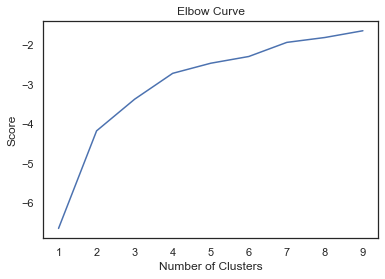

In [181]:
plt.plot(num_clusters, score)
plt.xlabel('Number of Clusters')

plt.ylabel('Score')

plt.title('Elbow Curve')

plt.show()

In [182]:
# set number of clusters
kclusters = 4

#london_grouped_clustering = london_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(london_grouped_clustering_fit)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 0, 0, 3, 3, 3, 3, 3, 0, 0])

In [183]:
# add clustering labels
#neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
#london_grouped.insert(0, 'Cluster Labels', kmeans.labels_)
london_grouped_clustering.insert(0, 'Cluster Labels', kmeans.labels_)


In [184]:
london_grouped_clustering.head()

Cluster Labels           Neighborhood  Accessories Store  \
0               0   Barking and Dagenham                0.0   
1               0                  Brent                0.0   
2               0                  Brent                0.0   
3               3                Bromley                0.0   
4               3                Bromley                0.0   

   Afghan Restaurant  African Restaurant  American Restaurant  Antique Shop  \
0                0.0            0.000000                  0.0           0.0   
1                0.0            0.009615                  0.0           0.0   
2                0.0            0.009615                  0.0           0.0   
3                0.0            0.000000                  0.0           0.0   
4                0.0            0.000000                  0.0           0.0   

   Aquarium  Arcade  Arepa Restaurant  Argentinian Restaurant  Art Gallery  \
0       0.0     0.0               0.0                     0.0     0.000000   
1       0.0     0.0               0.0                     0.0     0.028846   
2       0.0     0.0               0.0                     0.0     0.028846   
3       0.0     0.0               0.0                     0.0     0.000000   
4       0.0     0.0               0.0                     0.0     0.000000   

   Art Museum  Arts & Crafts Store  Asian Restaurant  Athletics & Sports  \
0    0.000000             0.000000          0.000000                 0.0   
1    0.019231             0.009615          0.009615                 0.0   
2    0.019231             0.009615          0.009615                 0.0   
3    0.000000             0.000000          0.000000                 0.0   
4    0.000000             0.000000          0.000000                 0.0   

   Australian Restaurant  Austrian Restaurant  Auto Garage  Auto Workshop  \
0                    0.0                  0.0          0.0            0.0   
1                    0.0                  0.0          0.0            0.0   
2                    0.0                  0.0          0.0            0.0   
3                    0.0                  0.0          0.0            0.0   
4                    0.0                  0.0          0.0            0.0   

   BBQ Joint  Bagel Shop    Bakery       Bar  Beach  Bed & Breakfast  \
0        0.0         0.0  0.000000  0.000000    0.0              0.0   
1        0.0         0.0  0.009615  0.009615    0.0              0.0   
2        0.0         0.0  0.009615  0.009615    0.0              0.0   
3        0.0         0.0  0.000000  0.000000    0.0              0.0   
4        0.0         0.0  0.000000  0.000000    0.0              0.0   

   Beer Bar  Beer Garden  Beer Store  Betting Shop  Bike Shop    Bistro  \
0       0.0          0.0         0.0           0.0        0.0  0.000000   
1       0.0          0.0         0.0           0.0        0.0  0.000000   
2       0.0          0.0         0.0           0.0        0.0  0.000000   
3       0.0          0.0         0.0           0.0        0.0  0.052632   
4       0.0          0.0         0.0           0.0        0.0  0.052632   

   Boarding House  Bookstore  Boutique  Bowling Alley  Boxing Gym  Brasserie  \
0             0.0   0.000000  0.000000            0.0         0.0        0.0   
1             0.0   0.019231  0.009615            0.0         0.0        0.0   
2             0.0   0.019231  0.009615            0.0         0.0        0.0   
3             0.0   0.000000  0.000000            0.0         0.0        0.0   
4             0.0   0.000000  0.000000            0.0         0.0        0.0   

   Brazilian Restaurant  Breakfast Spot  Brewery  Bubble Tea Shop  Building  \
0                   0.0             0.0      0.0              0.0       0.0   
1                   0.0             0.0      0.0              0.0       0.0   
2                   0.0             0.0      0.0              0.0       0.0   
3                   0.0             0.0      0.0              0.0       0.0   


In [185]:
london_grouped_clustering.to_csv("london_grouped_clustering_KMeans.csv")

In [186]:
# value_name is 'value' by default, but setting it here to make it clear
london_unpivot= pd.melt(london_grouped_clustering, 
                        id_vars=['Cluster Labels','Neighborhood','London_borough','latitude','longitude'
                                 ,'avg_rent','AVG_Rent_Scaled'],var_name='Venue',value_name='Freq')

In [187]:
london_unpivot.head()

Cluster Labels           Neighborhood         London_borough   latitude  \
0               0   Barking and Dagenham   Barking and Dagenham  51.572890   
1               0                  Brent                  Brent  51.506420   
2               0                  Brent                  Brent  51.562370   
3               3                Bromley                Bromley  51.452068   
4               3                Bromley                Bromley  51.426740   

   longitude  avg_rent  AVG_Rent_Scaled              Venue  Freq  
0   0.147528    318.75         0.016909  Accessories Store   0.0  
1  -0.127210    347.00         0.026095  Accessories Store   0.0  
2  -0.221310    457.00         0.061865  Accessories Store   0.0  
3   0.172230    307.00         0.013088  Accessories Store   0.0  
4  -0.055330    362.75         0.031217  Accessories Store   0.0

In [188]:
london_unpivot.shape

(79200, 9)

In [189]:
df_cluster = pd.DataFrame(london_unpivot.groupby('Cluster Labels')['latitude','longitude'].nunique())
df_cluster

latitude  longitude
Cluster Labels                     
0                     62         62
1                      2          2
2                     17         17
3                     96         96

Text(0.5, 1.0, 'Cluster 0 contains 62 points with an average weekly rent of: £359')

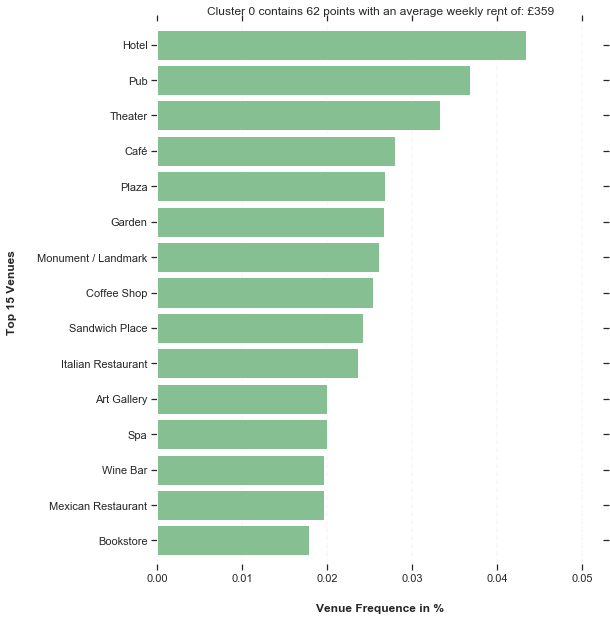

In [191]:
x = london_unpivot[london_unpivot["Cluster Labels"]==0].groupby('Venue')['Freq'].mean().sort_values().tail(15)
x_mean=int(london_unpivot[london_unpivot["Cluster Labels"]==0]["avg_rent"].mean())
x_count=df_cluster.iloc[0]['latitude']
ax = x.plot(kind='barh', figsize=(8, 10), color='#86bf91', zorder=2, width=0.85)

# Despine
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Switch off ticks
ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

# Draw vertical axis lines
vals = ax.get_xticks()
for tick in vals:
    ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

# Set x-axis label
ax.set_xlabel("Venue Frequence in %", labelpad=20, weight='bold', size=12)

# Set y-axis label
ax.set_ylabel("Top 15 Venues", labelpad=20, weight='bold', size=12)

# Set title
ax.set_title(f"Cluster 0 contains {x_count} points with an average weekly rent of: £{x_mean}")


Text(0.5, 1.0, 'Cluster 1 contains 2 points with an average weekly rent of: £2727')

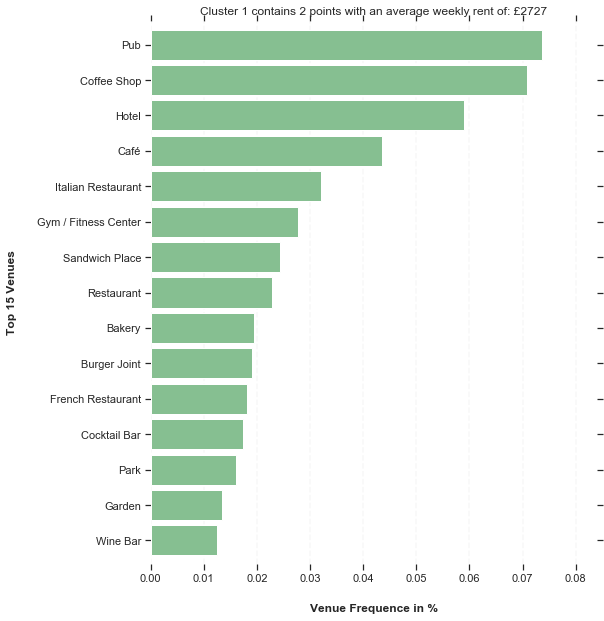

In [192]:
x = london_unpivot[london_unpivot["Cluster Labels"]==1].groupby('Venue')['Freq'].mean().sort_values().tail(15)
x_mean=int(london_unpivot[london_unpivot["Cluster Labels"]==1]["avg_rent"].mean())
x_count=df_cluster.iloc[1]['latitude']
ax = x.plot(kind='barh', figsize=(8, 10), color='#86bf91', zorder=2, width=0.85)

# Despine
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Switch off ticks
ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

# Draw vertical axis lines
vals = ax.get_xticks()
for tick in vals:
    ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

# Set x-axis label
ax.set_xlabel("Venue Frequence in %", labelpad=20, weight='bold', size=12)

# Set y-axis label
ax.set_ylabel("Top 15 Venues", labelpad=20, weight='bold', size=12)

# Set title
ax.set_title(f"Cluster 1 contains {x_count} points with an average weekly rent of: £{x_mean}")


Text(0.5, 1.0, 'Cluster 2 contains 17 points with an average weekly rent of: £1155')

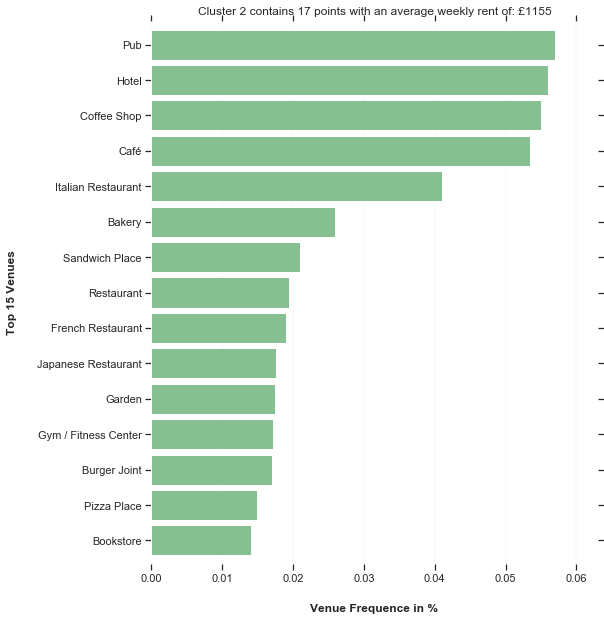

In [193]:
x = london_unpivot[london_unpivot["Cluster Labels"]==2].groupby('Venue')['Freq'].mean().sort_values().tail(15)
x_mean=int(london_unpivot[london_unpivot["Cluster Labels"]==2]["avg_rent"].mean())
x_count=df_cluster.iloc[2]['latitude']
ax = x.plot(kind='barh', figsize=(8, 10), color='#86bf91', zorder=2, width=0.85)

# Despine
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Switch off ticks
ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

# Draw vertical axis lines
vals = ax.get_xticks()
for tick in vals:
    ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

# Set x-axis label
ax.set_xlabel("Venue Frequence in %", labelpad=20, weight='bold', size=12)

# Set y-axis label
ax.set_ylabel("Top 15 Venues", labelpad=20, weight='bold', size=12)

# Set title
ax.set_title(f"Cluster 2 contains {x_count} points with an average weekly rent of: £{x_mean}")


Text(0.5, 1.0, 'Cluster 3 contains 96 points with an average weekly rent of: £472')

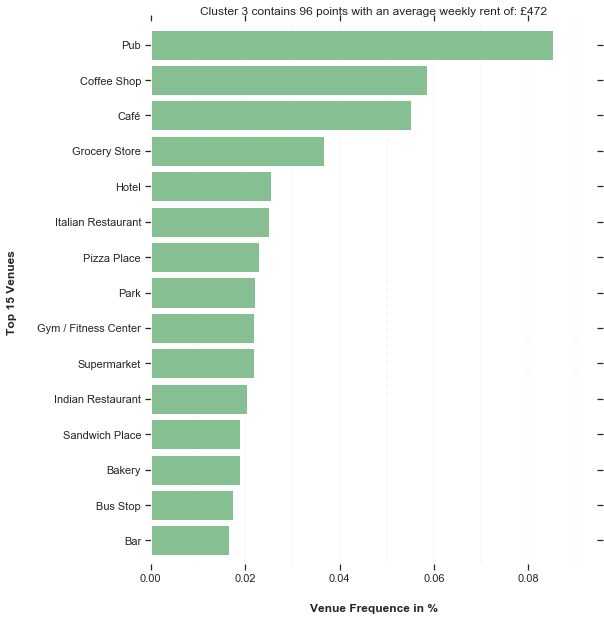

In [194]:
x = london_unpivot[london_unpivot["Cluster Labels"]==3].groupby('Venue')['Freq'].mean().sort_values().tail(15)
x_mean=int(london_unpivot[london_unpivot["Cluster Labels"]==3]["avg_rent"].mean())
x_count=df_cluster.iloc[3]['latitude']
ax = x.plot(kind='barh', figsize=(8, 10), color='#86bf91', zorder=2, width=0.85)

# Despine
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Switch off ticks
ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

# Draw vertical axis lines
vals = ax.get_xticks()
for tick in vals:
    ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

# Set x-axis label
ax.set_xlabel("Venue Frequence in %", labelpad=20, weight='bold', size=12)

# Set y-axis label
ax.set_ylabel("Top 15 Venues", labelpad=20, weight='bold', size=12)

# Set title
ax.set_title(f"Cluster 3 contains {x_count} points with an average weekly rent of: £{x_mean}")


After exploring our 4 clusters we can name them based on their most frequent venues  
as well as their avg weekly rent

Cluster 0 is the most affordable in term of renting and seems to be a good place for going out    
as well as enjoying a walk in a park visiting galleries or tasting wines.

Cluster 1 has exorbitant renting price and has only two districts in its cluster.

Cluster 2 is also quite expensive and has many hotels, pubs, cafes and restaurants the points of this clusters   are  likely to be located in the city centre.

Cluster 3 is a bit more expensive than cluster 0 but much cheaper than cluster 1 and 2, appart from the  
renting price cluster 3 is very simmilar to cluster 2.

According to their price and top venues I decided to name the 4 clusters as follows:  
**Cluster 0**: Quiet & Cheap  
**Cluster 1**: Exorbitant  
**Cluster 2**: High rent and best districts to go out   
**Cluster 3**: Affordable and good for going out   

In [195]:
london_grouped_clustering['Cluster Labels Desc']=london_grouped_clustering['Cluster Labels'].replace({0: 'Quiet & Cheap'
                                                     , 1: 'Exorbitant'
                                                     , 2: 'High rent and best districts to go out'
                                                     , 3: 'Affordable and good for going out'})

In [196]:
london_grouped_clustering.head()

Cluster Labels           Neighborhood  Accessories Store  \
0               0   Barking and Dagenham                0.0   
1               0                  Brent                0.0   
2               0                  Brent                0.0   
3               3                Bromley                0.0   
4               3                Bromley                0.0   

   Afghan Restaurant  African Restaurant  American Restaurant  Antique Shop  \
0                0.0            0.000000                  0.0           0.0   
1                0.0            0.009615                  0.0           0.0   
2                0.0            0.009615                  0.0           0.0   
3                0.0            0.000000                  0.0           0.0   
4                0.0            0.000000                  0.0           0.0   

   Aquarium  Arcade  Arepa Restaurant  Argentinian Restaurant  Art Gallery  \
0       0.0     0.0               0.0                     0.0     0.000000   
1       0.0     0.0               0.0                     0.0     0.028846   
2       0.0     0.0               0.0                     0.0     0.028846   
3       0.0     0.0               0.0                     0.0     0.000000   
4       0.0     0.0               0.0                     0.0     0.000000   

   Art Museum  Arts & Crafts Store  Asian Restaurant  Athletics & Sports  \
0    0.000000             0.000000          0.000000                 0.0   
1    0.019231             0.009615          0.009615                 0.0   
2    0.019231             0.009615          0.009615                 0.0   
3    0.000000             0.000000          0.000000                 0.0   
4    0.000000             0.000000          0.000000                 0.0   

   Australian Restaurant  Austrian Restaurant  Auto Garage  Auto Workshop  \
0                    0.0                  0.0          0.0            0.0   
1                    0.0                  0.0          0.0            0.0   
2                    0.0                  0.0          0.0            0.0   
3                    0.0                  0.0          0.0            0.0   
4                    0.0                  0.0          0.0            0.0   

   BBQ Joint  Bagel Shop    Bakery       Bar  Beach  Bed & Breakfast  \
0        0.0         0.0  0.000000  0.000000    0.0              0.0   
1        0.0         0.0  0.009615  0.009615    0.0              0.0   
2        0.0         0.0  0.009615  0.009615    0.0              0.0   
3        0.0         0.0  0.000000  0.000000    0.0              0.0   
4        0.0         0.0  0.000000  0.000000    0.0              0.0   

   Beer Bar  Beer Garden  Beer Store  Betting Shop  Bike Shop    Bistro  \
0       0.0          0.0         0.0           0.0        0.0  0.000000   
1       0.0          0.0         0.0           0.0        0.0  0.000000   
2       0.0          0.0         0.0           0.0        0.0  0.000000   
3       0.0          0.0         0.0           0.0        0.0  0.052632   
4       0.0          0.0         0.0           0.0        0.0  0.052632   

   Boarding House  Bookstore  Boutique  Bowling Alley  Boxing Gym  Brasserie  \
0             0.0   0.000000  0.000000            0.0         0.0        0.0   
1             0.0   0.019231  0.009615            0.0         0.0        0.0   
2             0.0   0.019231  0.009615            0.0         0.0        0.0   
3             0.0   0.000000  0.000000            0.0         0.0        0.0   
4             0.0   0.000000  0.000000            0.0         0.0        0.0   

   Brazilian Restaurant  Breakfast Spot  Brewery  Bubble Tea Shop  Building  \
0                   0.0             0.0      0.0              0.0       0.0   
1                   0.0             0.0      0.0              0.0       0.0   
2                   0.0             0.0      0.0              0.0       0.0   
3                   0.0             0.0      0.0              0.0       0.0   


In [197]:
# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

In [203]:
lnd_geo = r'london_small.geojson'
lnd_map = folium.Map(location = [latitude, longitude], zoom_start = 11)

lnd_map.choropleth(
    geo_data=lnd_geo,
    data=london_grouped_clustering,
    columns=['London_borough','avg_rent'],
    key_on='feature.properties.name',
    fill_color='RdPu', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Average house Prices'
)
markers_colors = []
# add markers to the map
markers_colors = []
for lat, lon, cluster,Desc in zip(london_grouped_clustering['latitude']
                                  ,london_grouped_clustering['longitude']
                                  ,london_grouped_clustering['Cluster Labels']
                                 ,london_grouped_clustering['Cluster Labels Desc']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(Desc), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=3,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(lnd_map)
    
# display map
lnd_map

## Result

This is interesting to observe how each district has been classfified.
